In [42]:
#Import libraries
!pip install textblob
import pandas as pd
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re
from cleantext import clean
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from textblob import TextBlob
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 217.9 kB/s eta 0:00:03
   - ------------------------------------- 30.7/626.3 kB 217.9 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/626.3 kB 297.7 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/626.3 kB 374.1 kB/s eta 0:00:02
   -------- ----------------------------- 143.4/626.3 kB 500.5 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/626.3 kB 500.5 kB/s eta 0:00:01
   ----------- -------------------------- 194.6/626.3 kB 491.5 kB/s eta 0:00:01
   ------------ ------------------------- 204.8/626.3 kB 518.8 kB/s eta 0:00:01
   -


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv('blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [4]:
df.describe(include='all')

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [5]:
df.duplicated().sum()

0

In [6]:
df['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

### Data Visualization.

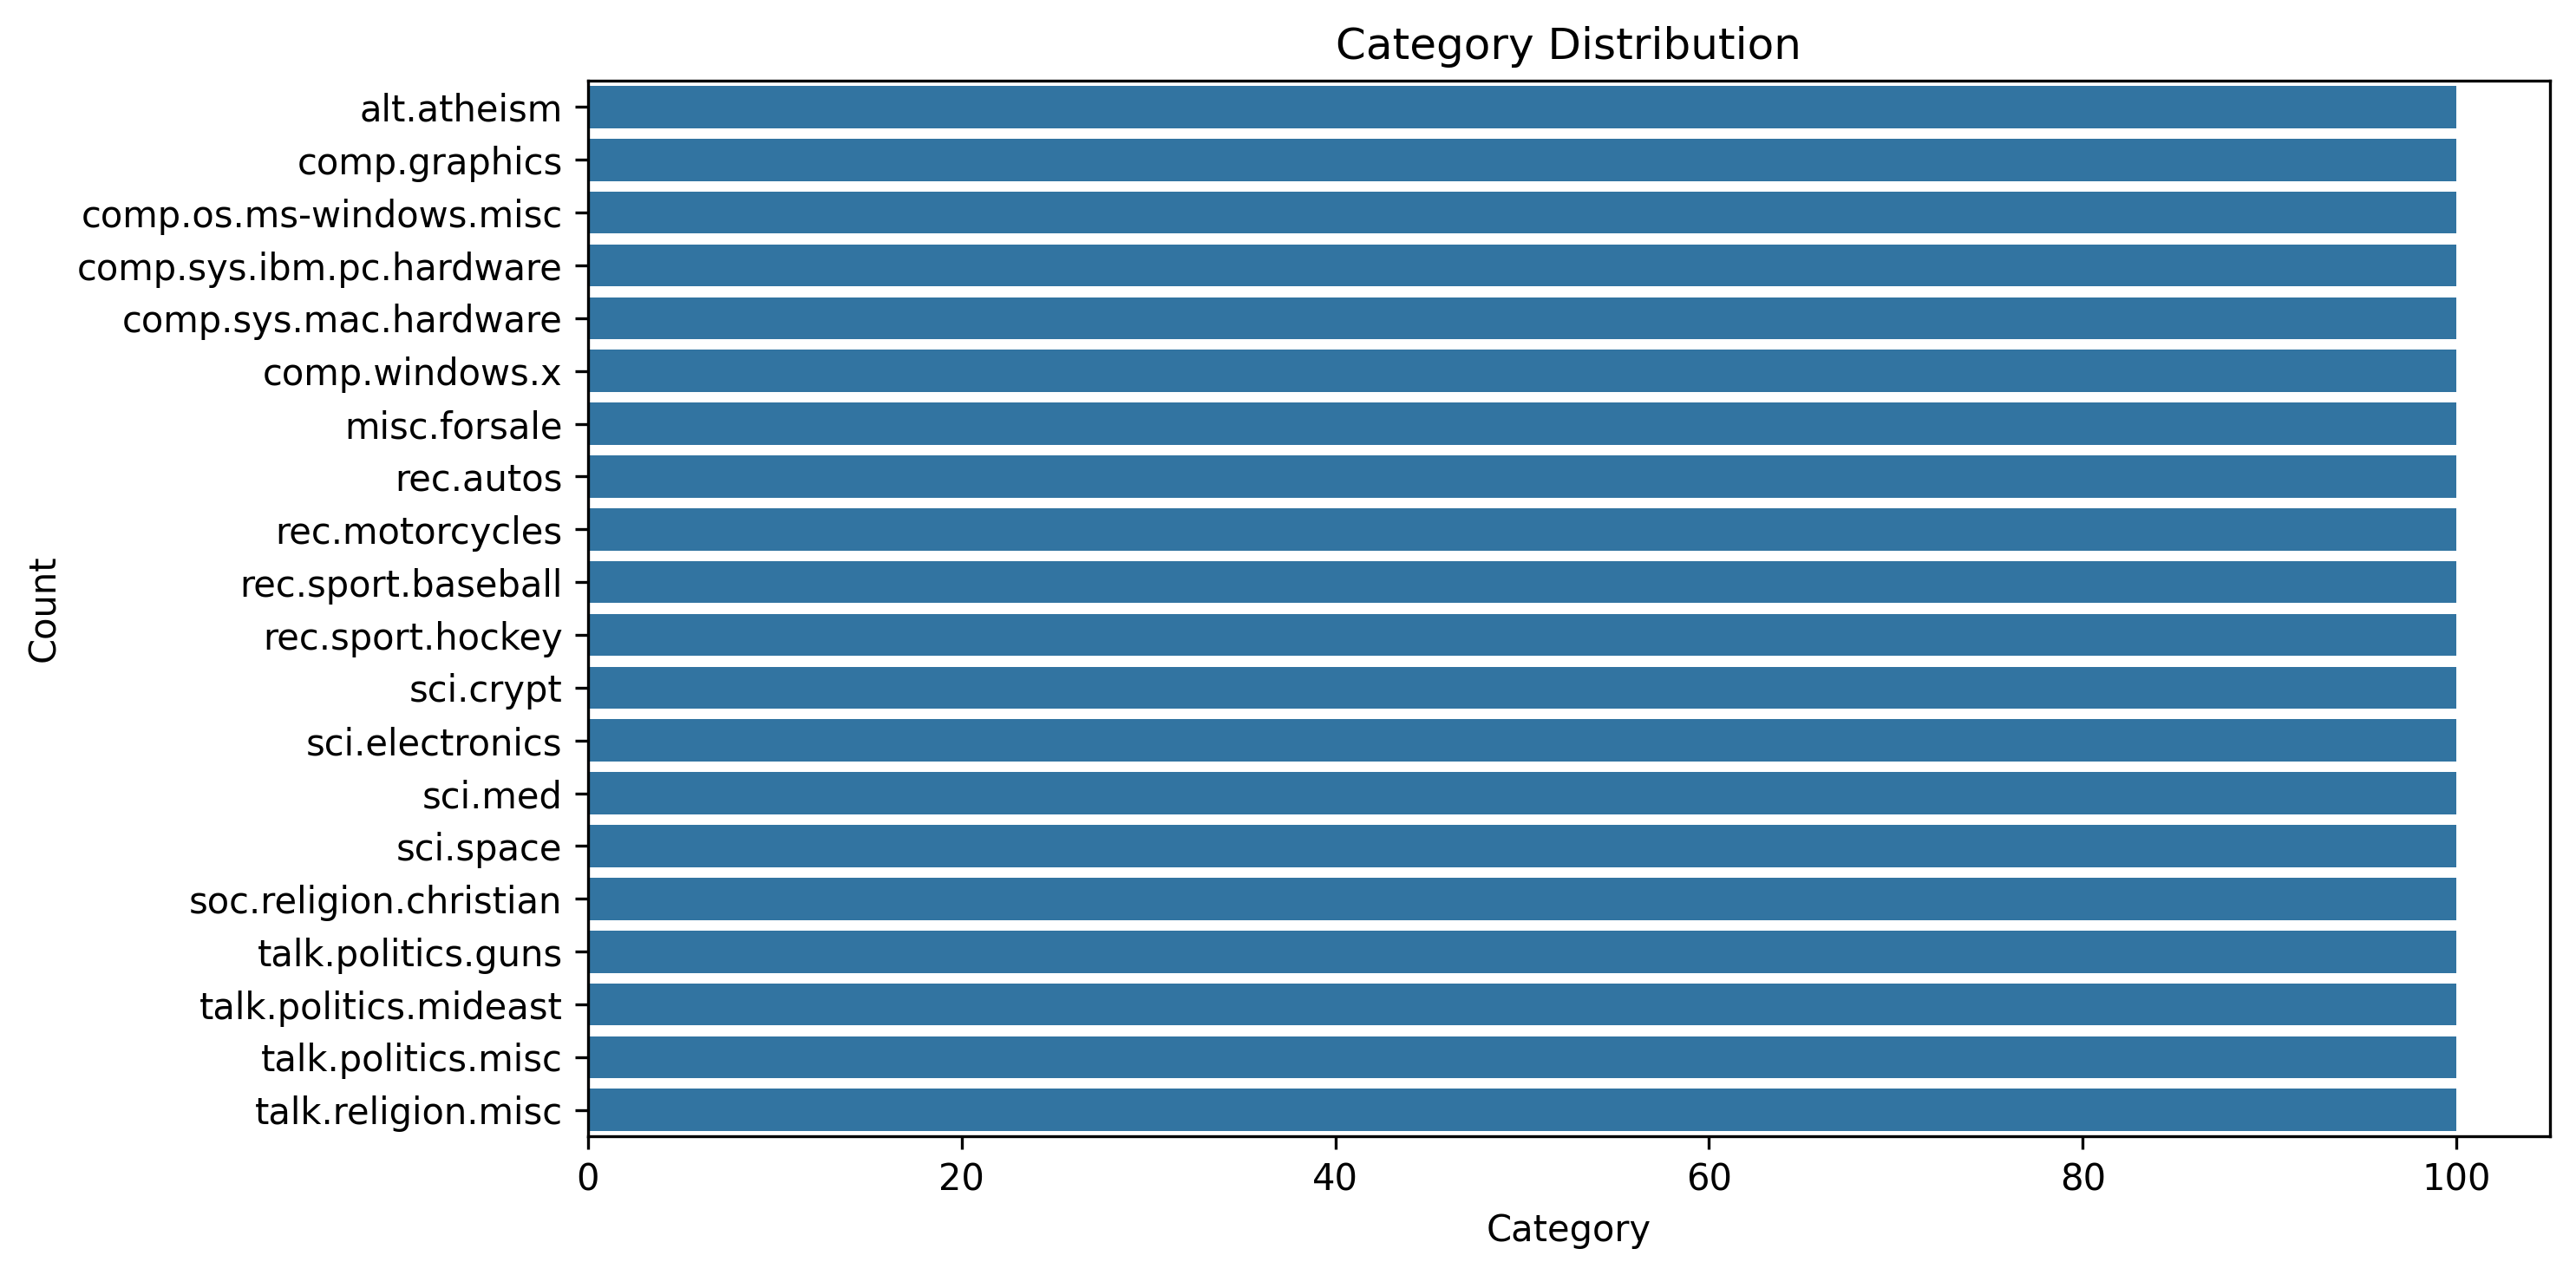

In [7]:
sns.countplot(y = df['Labels'])
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
LE = LabelEncoder()

In [10]:
x = LE.fit_transform(df['Labels'])
x

array([ 0,  0,  0, ..., 19, 19, 19])

In [11]:
df['Labels_encoded'] = x

In [12]:
df

,Data,Labels,Labels_encoded
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,19
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19


## Text preprocessing.

In [13]:
df.isnull().sum()

Data              0
Labels            0
Labels_encoded    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Data            2000 non-null   object
 1   Labels          2000 non-null   object
 2   Labels_encoded  2000 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 39.2+ KB


In [15]:
df['Data'][0]

'Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O\'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK,

In [16]:
lemma = WordNetLemmatizer()

In [17]:
corpus = []

for i in range(len(df)):
    sent = re.sub('[^a-zA-Z]',' ',df['Data'][i]) #Clean the text
    sent = sent.lower() #Text normalization
    sent = sent.split() #Word tokenize
    sent = [lemma.lemmatize(i) for i in sent if i not in stopwords.words('english')] #Lemmatization
    sent = ' '.join(sent) # Join sentences
    corpus.append(sent)

In [18]:
corpus

['path cantaloupe srv c cmu edu magnesium club cc cmu edu news sei cmu edu ci ohio state edu zaphod mp ohio state edu howland reston an net agate doc ic ac uk uknet mcsun germany eu net thoth mchp sni de horus ap mchp sni de frank frank uucp frank dwyer newsgroups alt atheism subject islamic genocide date apr gmt organization siemens nixdorf ag line distribution world message id r vej k horus ap mchp sni de reference r qe fido asd sgi com r ubl bd horus ap mchp sni de r ek uo fido asd sgi com nntp posting host ap mchp sni de article r ek uo fido asd sgi com livesey solntze wpd sgi com jon livesey writes article r ubl bd horus ap mchp sni de frank uucp frank dwyer writes article r qe fido asd sgi com livesey solntze wpd sgi com jon livesey writes noting particular society case mainland uk religously motivated murder murder kind say little whether inter religion murder elsewhere religiously motivated allows one conclude nothing inherent religion matter catholicism protestantism motivates

(-0.5, 999.5, 499.5, -0.5)

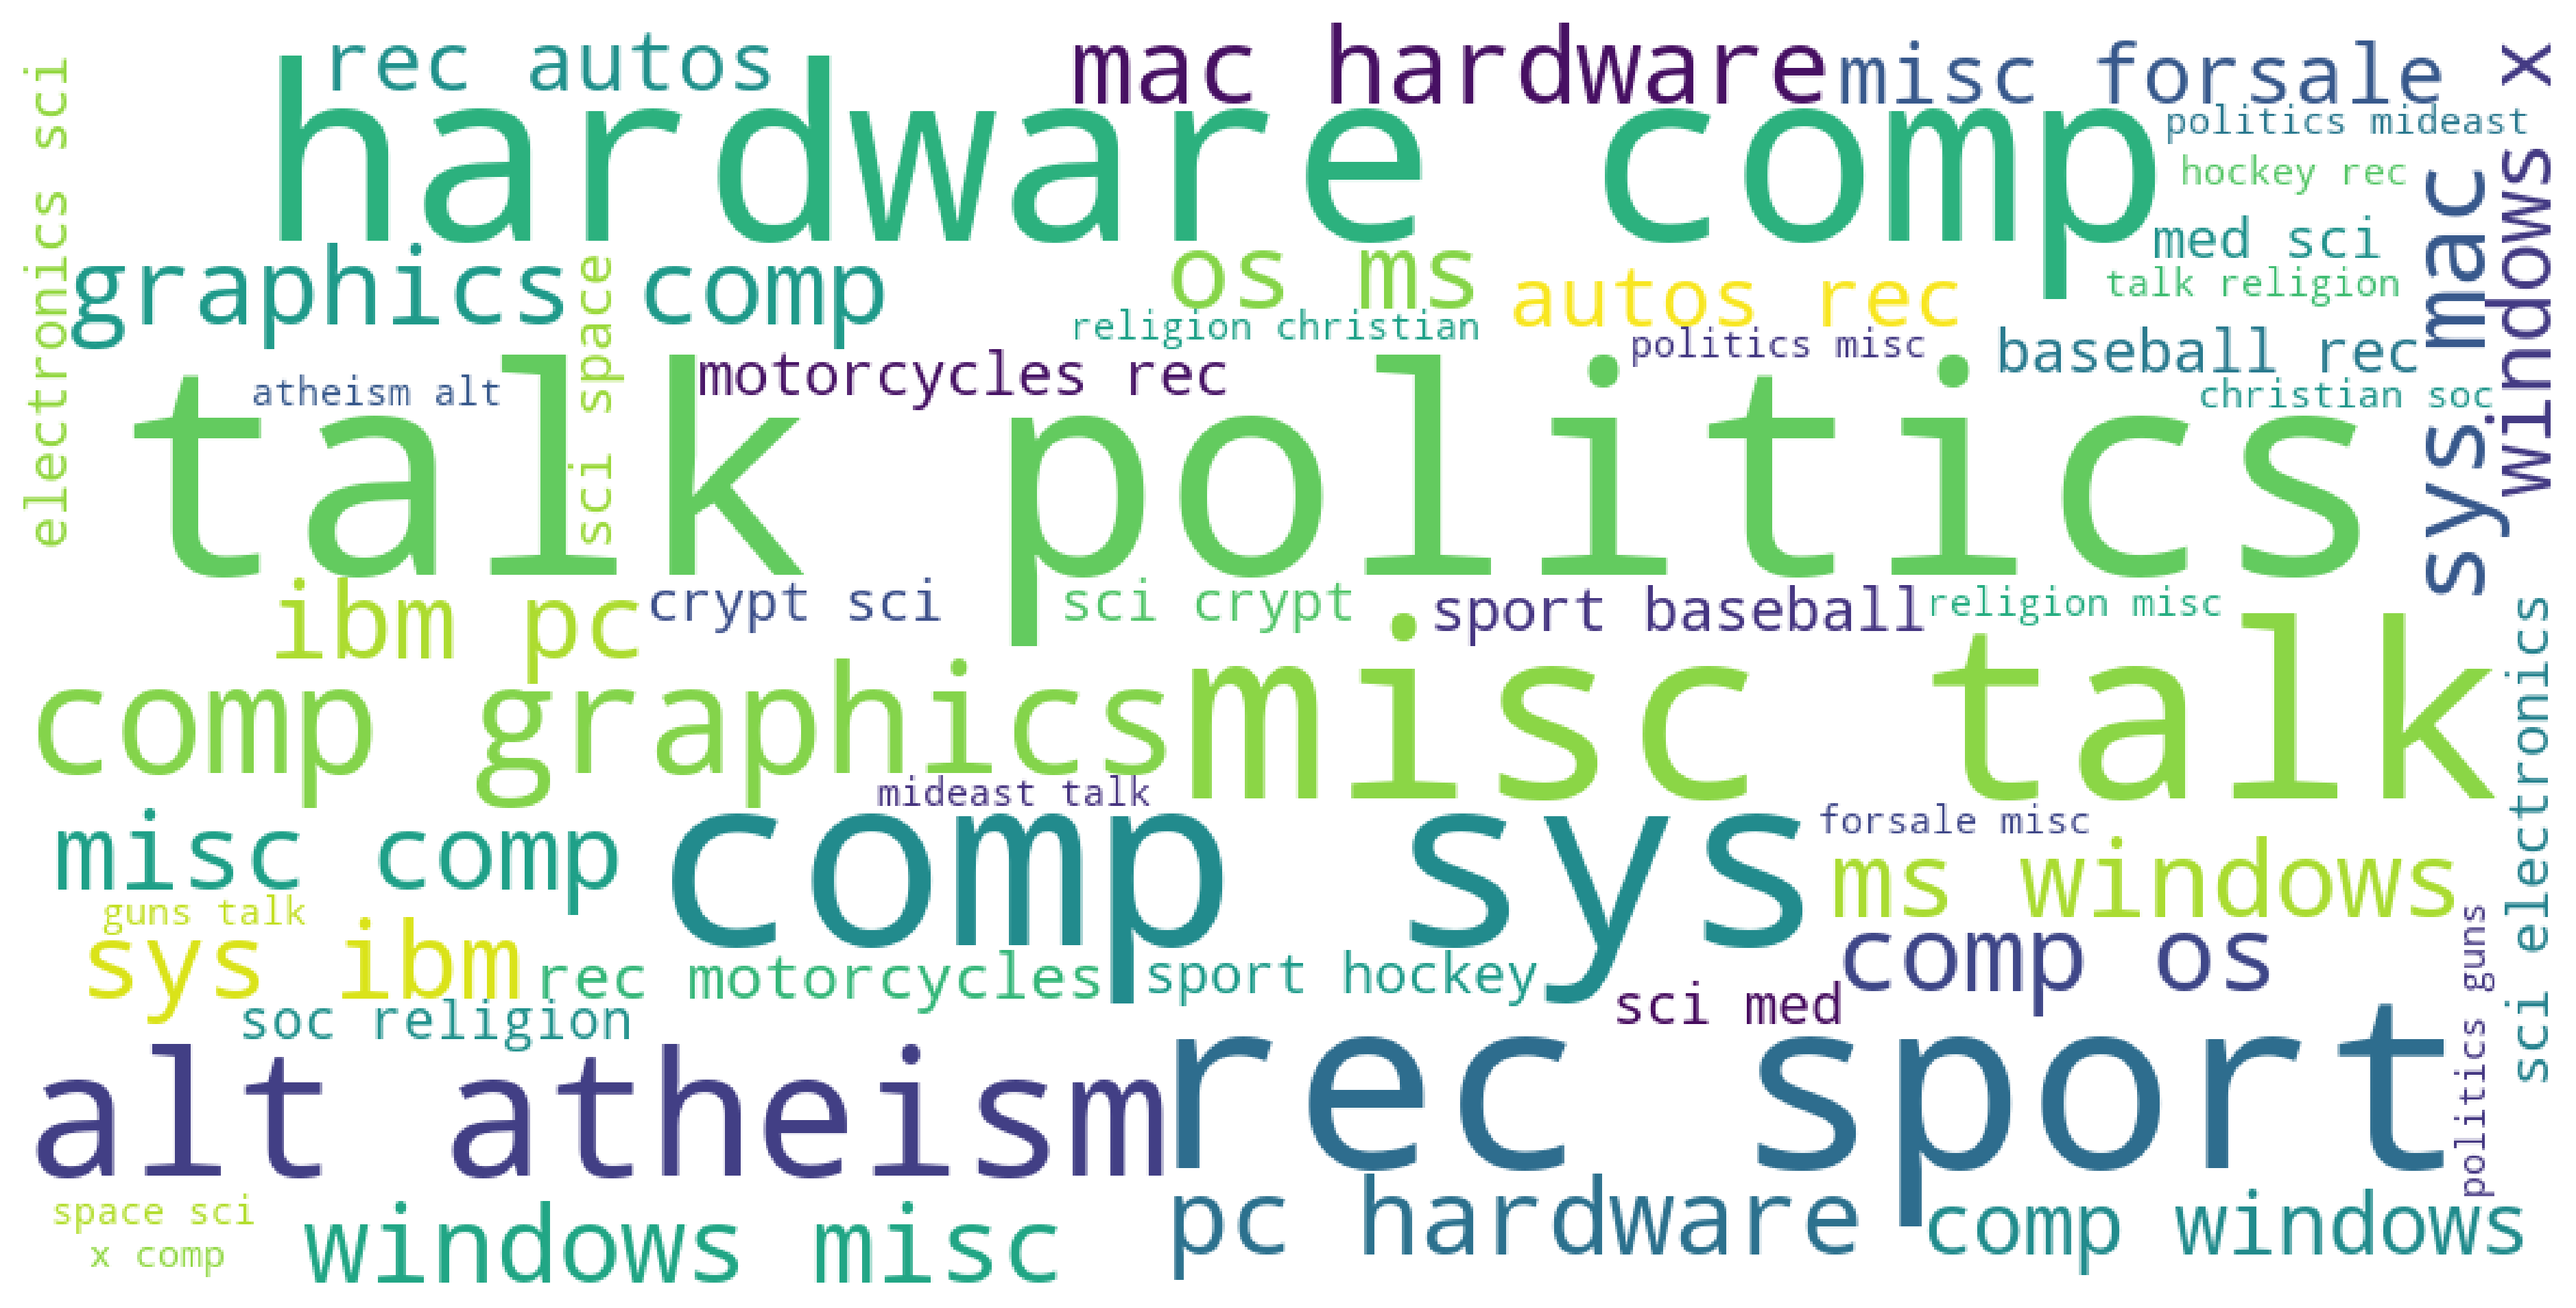

In [22]:
genre_list = df['Labels'].to_string()
wc = WordCloud(background_color="white", width =1000 , height=500).generate(genre_list)
plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation='None')
plt.axis("off")

# Model Building

### Feature Extraction
Tf-IDF

In [23]:
df.head()

,Data,Labels,Labels_encoded
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0


In [24]:
y = df['Labels_encoded']
y

0        0
1        0
2        0
3        0
4        0
        ..
1995    19
1996    19
1997    19
1998    19
1999    19
Name: Labels_encoded, Length: 2000, dtype: int32

In [25]:
# tfidfVectorizer is a tool provided by the scikit-learn library in Python, that converts a collection of raw documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features.
# Create a TfidfVectorizer object with specified parameters
tf = TfidfVectorizer(
    max_features=4000,        # Maximum number of features (words/terms) to be considered
    ngram_range=(1, 5),       # Consider unigrams, bigrams, trigrams, 4-grams, and 5-grams
    stop_words='english',     # Use built-in list of English stop words to remove common words like 'the', 'is', etc.
    norm='l2',                # Apply L2 normalization to the term frequencies
    max_df=0.8,               # Ignore terms that appear in more than 80% of the documents
    analyzer='word'           # Analyze words (as opposed to characters or character n-grams)
)

# Fit the vectorizer to the corpus
tf.fit(corpus)

# Transform the corpus into a TF-IDF feature matrix
X_data = tf.fit_transform(corpus)

X_data.shape

(2000, 4000)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y,test_size=0.2, random_state=1)
print('X_train shape :',X_train.shape)
print('X_test shape :',X_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)

X_train shape : (1600, 4000)
X_test shape : (400, 4000)
y_train shape : (1600,)
y_test shape : (400,)


In [32]:
def hyperparameter_tuning_1(model, params, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):

    gscv=GridSearchCV(model,params,scoring='accuracy',cv=20,return_train_score=True, verbose=1)
    gscv.fit(X_train,y_train)
    ypred = gscv.predict(X_test)
    print("1) Best Score :", gscv.best_score_)
    print("2) Best Parameters :",gscv.best_params_)
    print(f"3) Train Accuracy: {gscv.score(X_train,y_train)}\nTest Accuracy: {gscv.score(X_test,y_test)}")
    return gscv.best_params_


def hyperparameter_tuning_2(model, params, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    # Convert X_train and X_test to dense arrays if they are sparse
    if hasattr(X_train, 'toarray'):
        X_train = X_train.toarray()
    if hasattr(X_test, 'toarray'):
        X_test = X_test.toarray()

    gscv=GridSearchCV(model,params,scoring='accuracy',cv=20,return_train_score=True)
    gscv.fit(X_train,y_train)
    ypred = gscv.predict(X_test)
    print("1) Best Score :", gscv.best_score_)
    print("2) Best Parameters :",gscv.best_params_)
    print(f"3) Train Accuracy: {gscv.score(X_train,y_train)}\nTest Accuracy: {gscv.score(X_test,y_test)}")
    return gscv.best_params_

In [33]:
Bnb = BernoulliNB()
params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'binarize': [None, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'fit_prior': [False],
    'class_prior':[None],
    'force_alpha': [True],
    }

bnb_best_params = hyperparameter_tuning_1(Bnb, params, X_train, y_train, X_test, y_test)

Fitting 20 folds for each of 72 candidates, totalling 1440 fits
1) Best Score : 0.93125
2) Best Parameters : {'alpha': 0.01, 'binarize': 0.0, 'class_prior': None, 'fit_prior': False, 'force_alpha': True}
3) Train Accuracy: 0.9925
Test Accuracy: 0.96


In [34]:
Gnb = GaussianNB()
params = {'priors': [None, {0: 0.5, 1: 0.5}],
          'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
          }

gnb_best_params = hyperparameter_tuning_2(Gnb, params, X_train, y_train, X_test, y_test)

1) Best Score : 0.698125
2) Best Parameters : {'priors': None, 'var_smoothing': 0.01}
3) Train Accuracy: 0.995625
Test Accuracy: 0.7175


In [35]:
Mnb=MultinomialNB()
params={'alpha': [ 0.001, 0.1, 1,2,3,4,5, 10,20,30,50,100],
       'force_alpha':[True, False],
       'fit_prior':[True, False],
       'class_prior':[None, {0: 0.5, 1: 0.5}]
       }

mnb_best_params = hyperparameter_tuning_1(Mnb, params, X_train, y_train, X_test, y_test)

Fitting 20 folds for each of 96 candidates, totalling 1920 fits
1) Best Score : 0.928125
2) Best Parameters : {'alpha': 10, 'class_prior': None, 'fit_prior': False, 'force_alpha': True}
3) Train Accuracy: 0.961875
Test Accuracy: 0.92


### Creating the final model with BernoulliNB because it is giving the highest accuracy.

In [39]:
final_model = BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=False, force_alpha=True)
final_model.fit(X_train,y_train)
ypred = final_model.predict(X_test)

print(f"Train Accuracy: {final_model.score(X_train,y_train)}\nTest Accuracy: {final_model.score(X_test,y_test)}")

Train Accuracy: 0.9925
Test Accuracy: 0.96


In [43]:
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='weighted')
recall = recall_score(y_test, ypred, average='weighted')
f1 = f1_score(y_test, ypred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(classification_report(y_test, ypred))


Accuracy: 0.96
Precision: 0.9621329966329968
Recall: 0.96
F1 Score: 0.9601859175567552
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.92      1.00      0.96        22
           2       1.00      1.00      1.00        21
           3       1.00      0.95      0.98        21
           4       1.00      1.00      1.00        14
           5       1.00      0.95      0.98        22
           6       1.00      1.00      1.00        21
           7       0.90      1.00      0.95        18
           8       1.00      0.95      0.97        20
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        19
          12       0.96      1.00      0.98        26
          13       1.00      0.93      0.97        15
          14       1.00      0.95      0.98        21
          15       1.00      1.00      1.00     

### Sentiment analysis.

In [44]:
# Function to get the sentiment
def get_sentiment_textblob(text):
    blob = TextBlob(text)
    #print('Blog :',text)
    #print('Sentiment :',blob.sentiment)

    if blob.sentiment.polarity > 0.05:
        return 'positive'
    elif blob.sentiment.polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Applying  the sentiment analysis
df['Sentiment'] = df['Data'].apply(get_sentiment_textblob)

df["Sentiment"].value_counts()  # To count occurrences of unique values.

Sentiment
positive    1192
neutral      542
negative     266
Name: count, dtype: int64

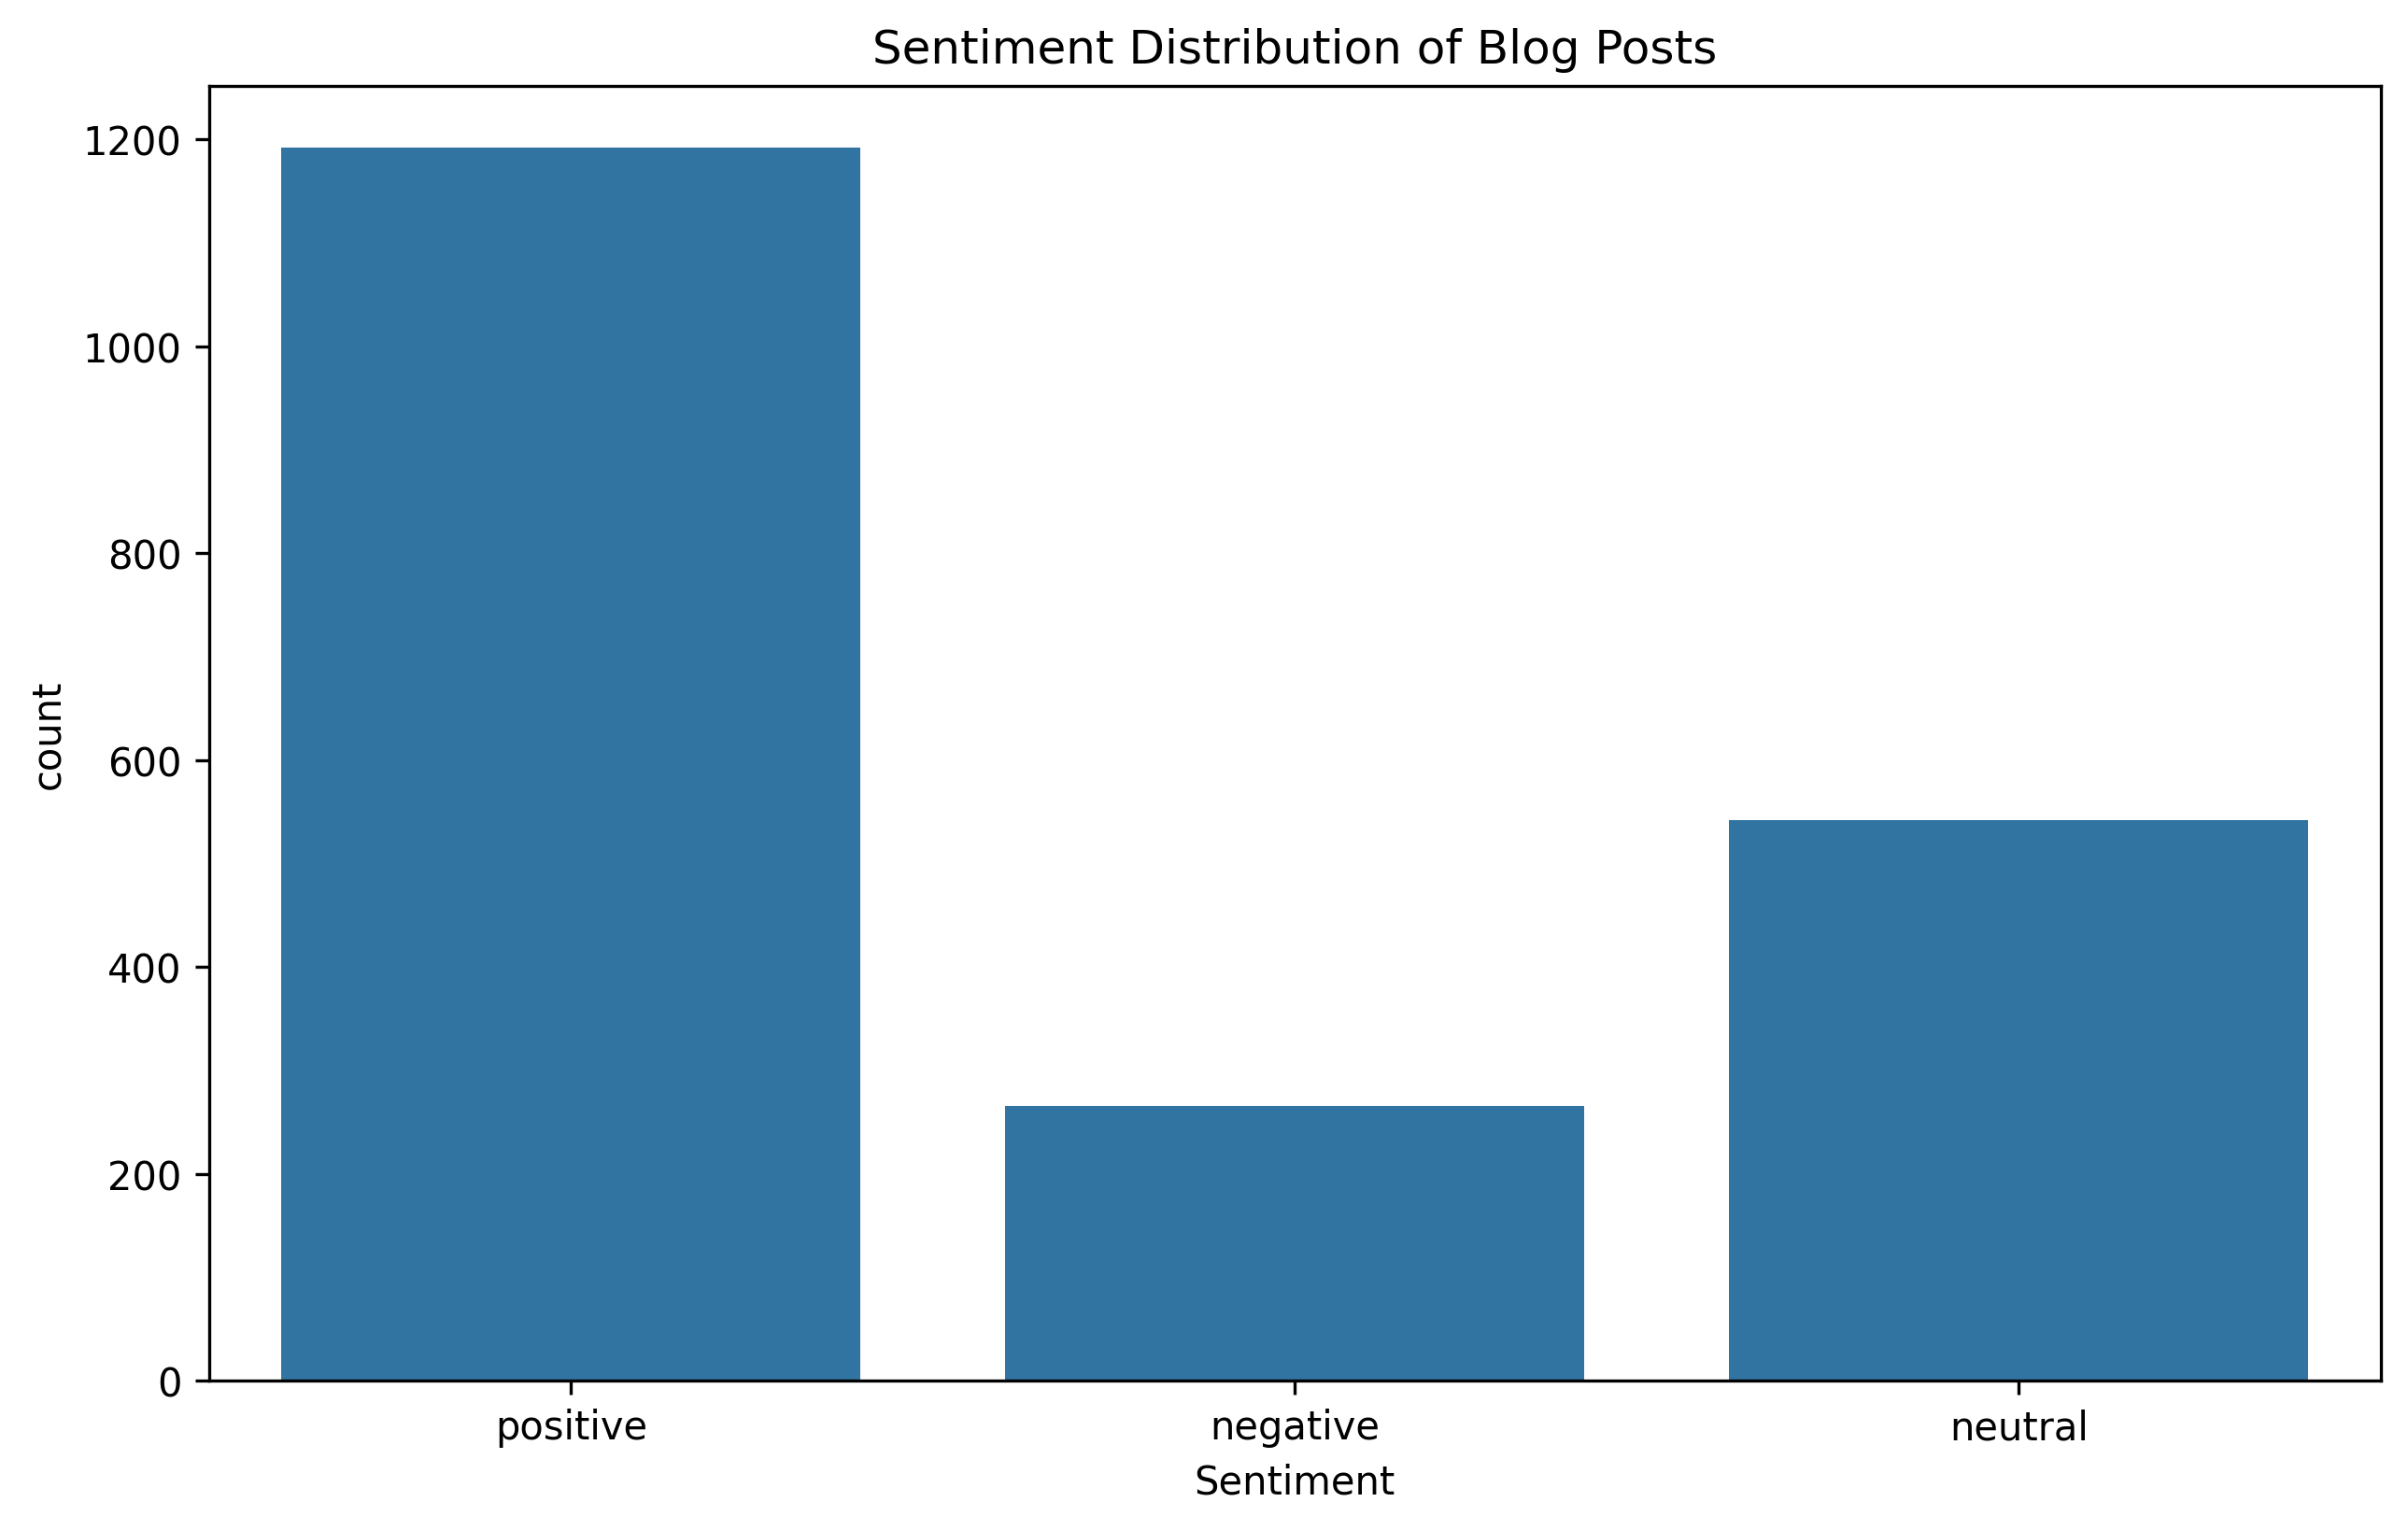

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution of Blog Posts')
plt.show()

In [46]:
sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
print(sentiment_distribution)

Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   0.12     0.28      0.60
comp.graphics                 0.15     0.25      0.60
comp.os.ms-windows.misc       0.17     0.19      0.64
comp.sys.ibm.pc.hardware      0.12     0.27      0.61
comp.sys.mac.hardware         0.12     0.24      0.64
comp.windows.x                0.17     0.27      0.56
misc.forsale                  0.13     0.21      0.66
rec.autos                     0.11     0.20      0.69
rec.motorcycles               0.14     0.24      0.62
rec.sport.baseball            0.17     0.27      0.56
rec.sport.hockey              0.20     0.28      0.52
sci.crypt                     0.08     0.32      0.60
sci.electronics               0.07     0.39      0.54
sci.med                       0.19     0.28      0.53
sci.space                     0.13     0.22      0.65
soc.religion.christian        0.09     0.33      0.58
talk.politics.guns          

<Figure size 3600x2400 with 0 Axes>

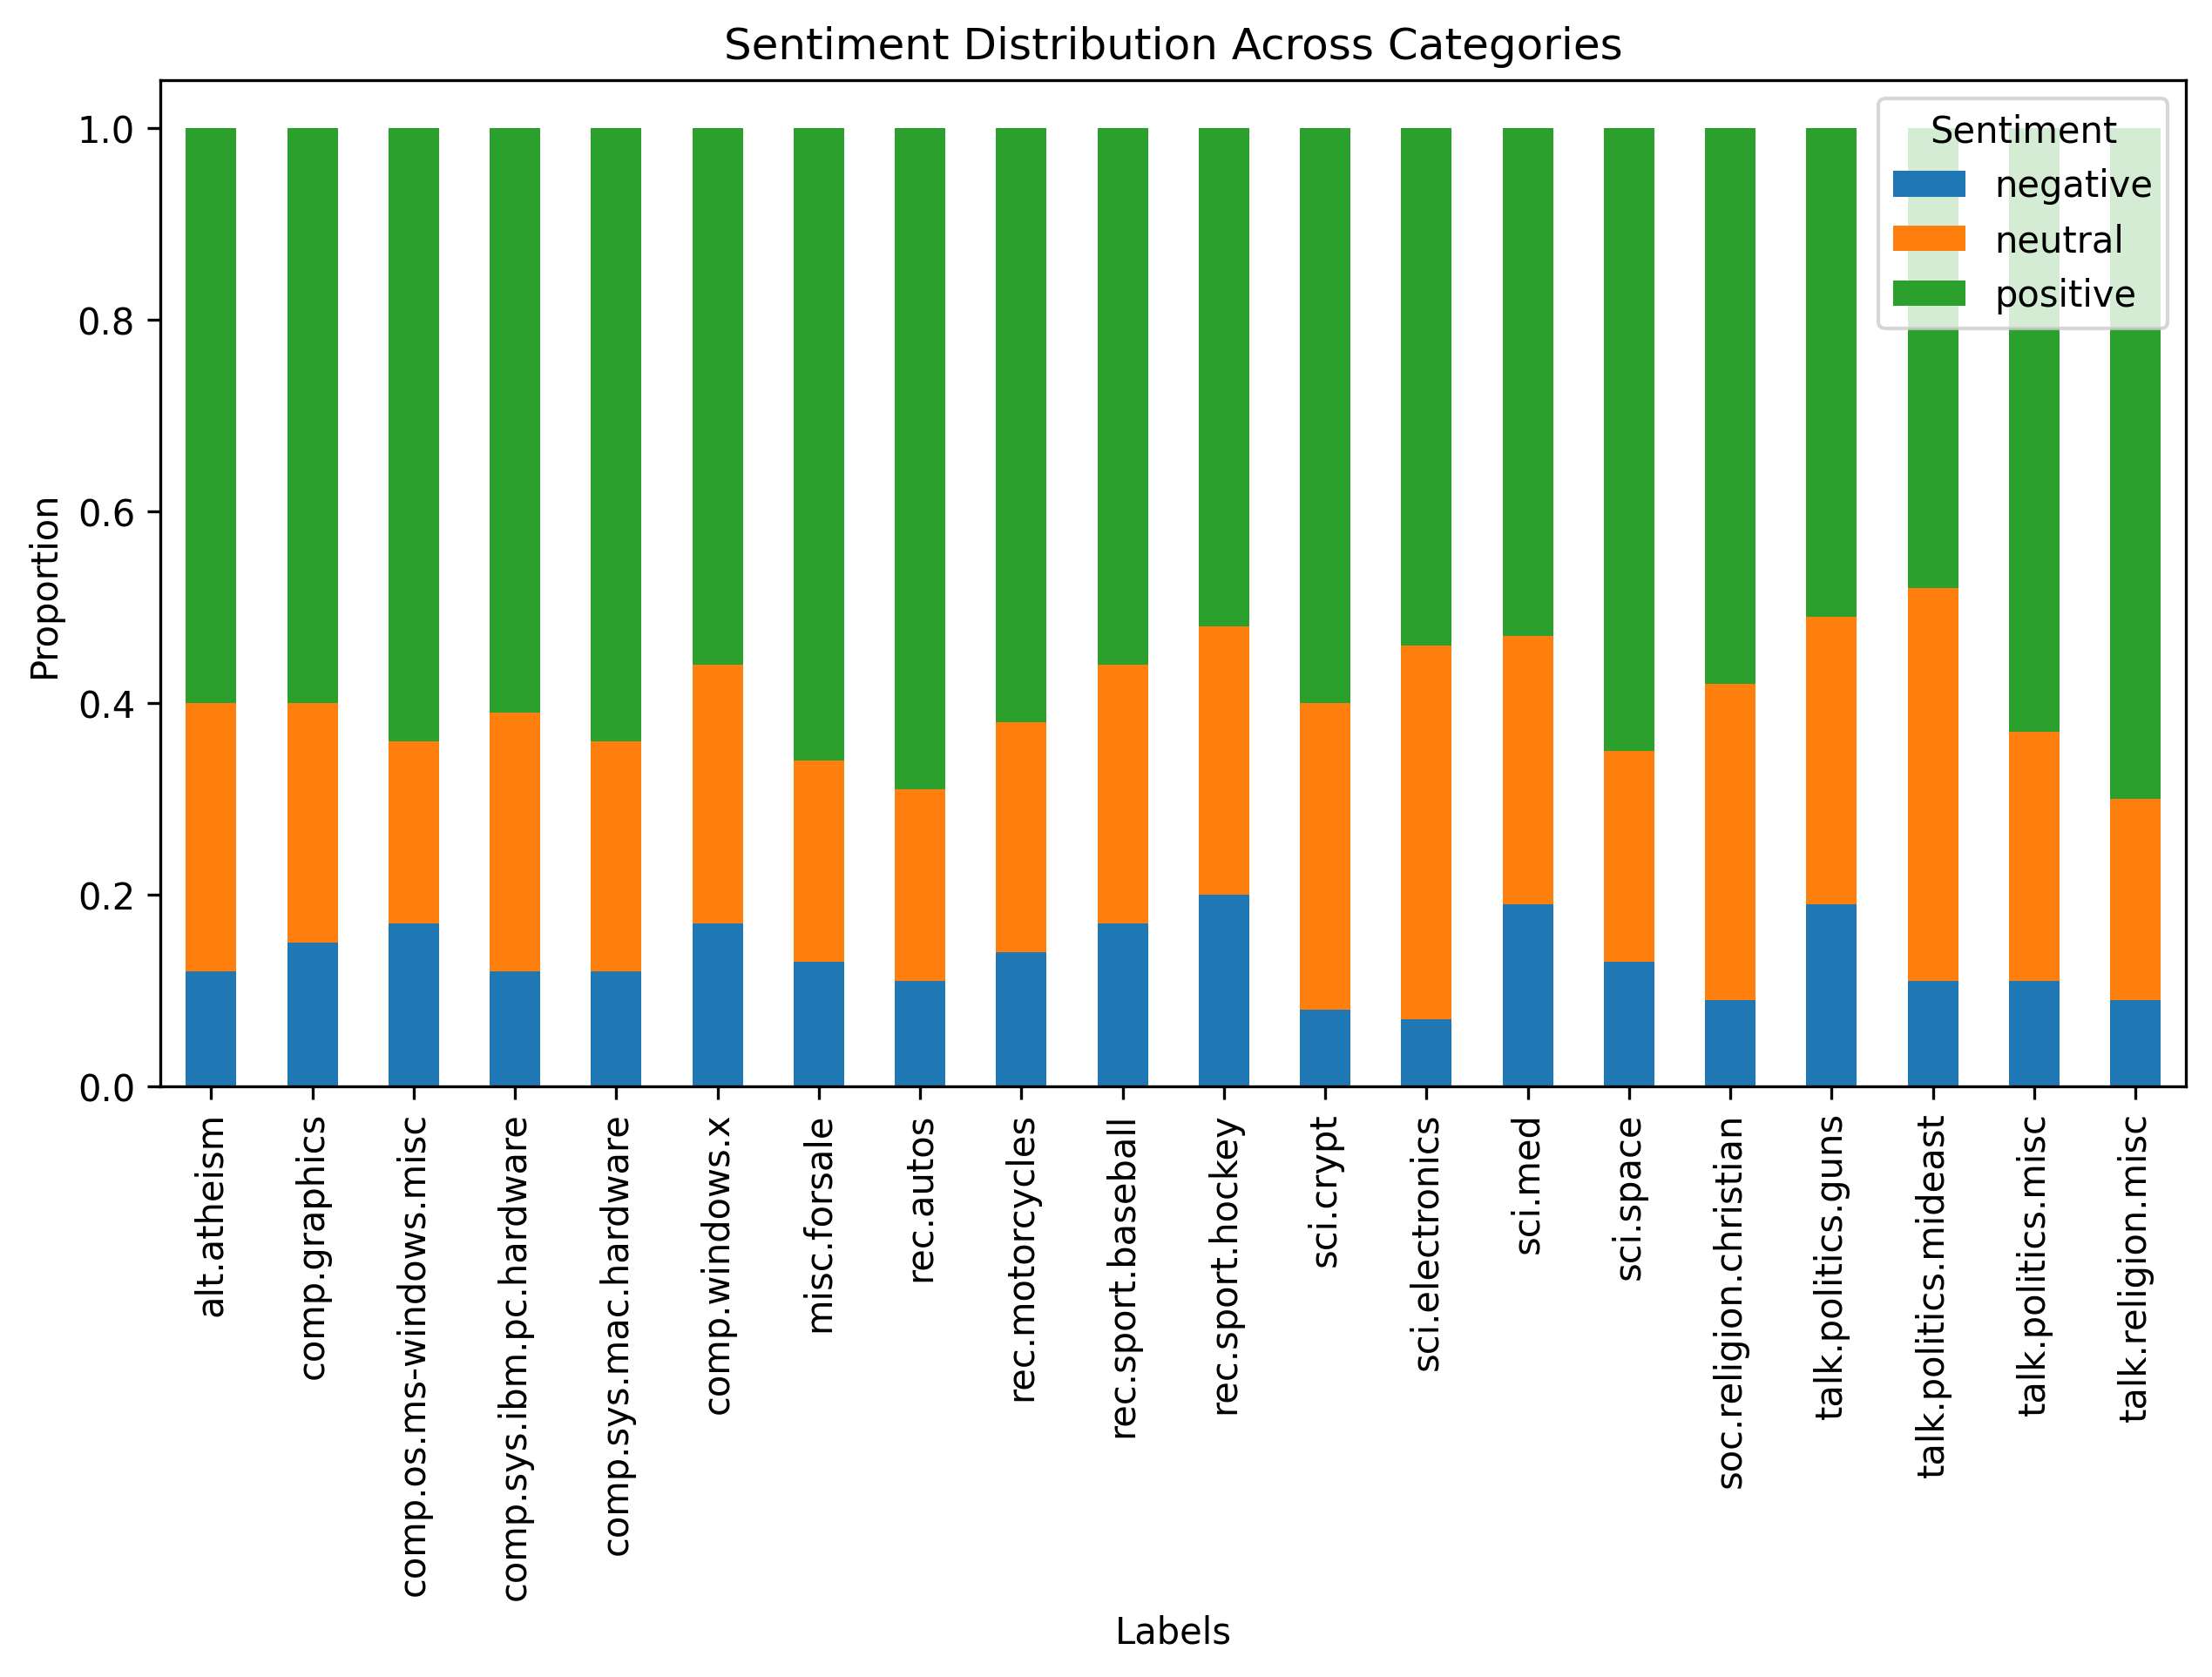

In [47]:
plt.figure(figsize=(12, 8))
sentiment_distribution.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Categories')
plt.ylabel('Proportion')
plt.show()

In [ ]:
tf = TfidfVectorizer()

x_data = tf.fit_transform(corpus)
x_data = x_data.toarray()
x_data

In [ ]:
x_data.shape

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x_data,y,test_size=0.2, random_state=1)

In [ ]:
clf1 = MultinomialNB()
clf2 = GaussianNB()
clf3 = BernoulliNB()

In [ ]:
clf1.fit(xtrain,ytrain)
clf2.fit(xtrain,ytrain)
clf3.fit(xtrain,ytrain)

In [ ]:
y_pred1=clf1.predict(xtest)
y_pred2=clf2.predict(xtest)
y_pred3=clf3.predict(xtest)

In [ ]:
print("Multinomial:",accuracy_score(ytest,y_pred1))
print("Gaussian:",accuracy_score(ytest,y_pred2))
print("Bernaulli:",accuracy_score(ytest,y_pred3))